In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/black-friday-anallytics-vidhya/sample_submission_V9Inaty.csv
/kaggle/input/black-friday-anallytics-vidhya/test_HujdGe7/test.csv
/kaggle/input/black-friday-anallytics-vidhya/train_oSwQCTC/train.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/black-friday-anallytics-vidhya/train_oSwQCTC/train.csv')
test_data=pd.read_csv('/kaggle/input/black-friday-anallytics-vidhya/test_HujdGe7/test.csv')

In [3]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
train_data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

#### Fill nan values

In [6]:
train_data['Product_Category_2']

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_2, Length: 550068, dtype: float64

In [7]:
train_data['Product_Category_2'].isna().sum()

173638

In [8]:
train_data['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [9]:
## fill it with the mode
train_data['Product_Category_2'].fillna(8.0,inplace=True)

In [10]:
train_data['Product_Category_3'].isna().sum()

383247

In [11]:
train_data['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [12]:
## fill na with mode value
train_data['Product_Category_3'].fillna(16.0,inplace=True)

In [13]:
train_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [14]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.260768,14.989567,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.294093,2.739846,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## EDA

In [15]:
train_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [16]:
train_data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

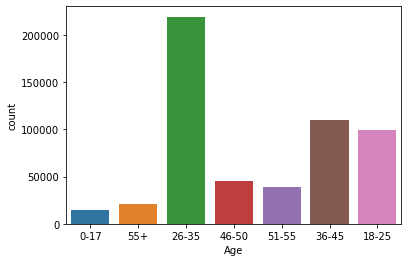

In [17]:
sns.countplot(train_data.Age)

In [18]:
dic={}
j=0
for i in train_data.Age.value_counts().index:
    dic[i]=j
    j+=1

In [19]:
train_data['Age']=train_data['Age'].map(dic)


In [20]:
train_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [21]:
train_data.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [22]:
dic={}
j=0
for i in train_data['City_Category'].value_counts().index:
    dic[i]=j
    j+=1

In [23]:
train_data['City_Category']=train_data['City_Category'].map(dic)

In [24]:
train_data.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [25]:
dic={}
j=0
for i in train_data['Stay_In_Current_City_Years'].value_counts().index:
    dic[i]=j
    j+=1

In [26]:
train_data['Stay_In_Current_City_Years']=train_data['Stay_In_Current_City_Years'].map(dic)

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()
le.fit(train_data['Gender'])
gender_train=le.transform(train_data['Gender'])

In [29]:
train_data['Gender']=gender_train

In [30]:
train_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Perform on testdata(preprocessing)

In [31]:
test_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [32]:
test_data['Product_Category_2'].fillna(8.0,inplace=True)
test_data['Product_Category_3'].fillna(16.0,inplace=True)

In [33]:

dic={}
j=0
for i in test_data.Age.value_counts().index:
    dic[i]=j
    j+=1
test_data['Age']=test_data['Age'].map(dic)


In [34]:
dic={}
j=0
for i in test_data.City_Category.value_counts().index:
    dic[i]=j
    j+=1
test_data['City_Category']=test_data['City_Category'].map(dic)

In [35]:
dic={}
j=0
for i in test_data.Stay_In_Current_City_Years.value_counts().index:
    dic[i]=j
    j+=1
test_data['Stay_In_Current_City_Years']=test_data['Stay_In_Current_City_Years'].map(dic)

In [36]:
test_data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [37]:
gender_test=le.transform(test_data['Gender'])
test_data['Gender']=gender_test

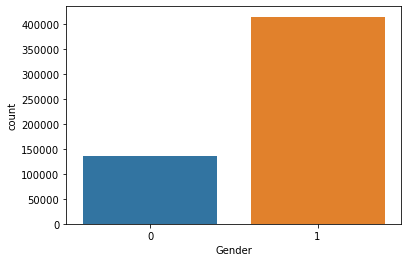

In [38]:
sns.countplot(train_data['Gender'])

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [53]:
skfold=StratifiedKFold(n_splits=6,random_state=None)


In [41]:
train_data.drop(columns=['User_ID','Product_ID'])

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,6,10,2,1,0,3,8.0,16.0,8370
1,0,6,10,2,1,0,1,6.0,14.0,15200
2,0,6,10,2,1,0,12,8.0,16.0,1422
3,0,6,10,2,1,0,12,14.0,16.0,1057
4,1,5,16,1,3,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,4,13,0,0,1,20,8.0,16.0,368
550064,0,0,1,1,2,0,20,8.0,16.0,371
550065,0,0,15,0,3,1,20,8.0,16.0,137
550066,0,5,1,1,1,0,20,8.0,16.0,365


In [42]:
y=train_data.iloc[:,-1]
X=train_data.drop(columns=['User_ID','Product_ID']).iloc[:,:-1]

In [57]:
algorithms={'lr': LinearRegression(),'lasso': Lasso(),'ridge': Ridge(),'elastic': ElasticNet(),'randomforestregressor': RandomForestRegressor()}

In [58]:
for train_index, val_index in skfold.split(X,y): 
    print("Train:", train_index, "Validation:", val_index) 
    X_train, X_test = X.iloc[train_index], X.iloc[val_index] 
    y_train, y_test = y[train_index], y[val_index]
    print('---------------------')
    for i in algorithms:
        print(i)
        algo=algorithms[i]
        algo.fit(X_train,y_train)
        predict=algo.predict(X_test)
        print('RMSE')
        print('----')
        print(np.sqrt(mean_squared_error(y_test,predict)))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)


Train: [   113    165    299 ... 550065 550066 550067] Validation: [     0      1      2 ... 547476 547507 547522]
---------------------
lr
RMSE
----
4672.632918744181
lasso
RMSE
----
4672.6418604734245
ridge
RMSE
----
4672.632919372389
elastic
RMSE
----
4676.15749604354
randomforestregressor
RMSE
----
3031.1295575705026
Train: [     0      1      2 ... 550065 550066 550067] Validation: [   165    652    873 ... 548285 548344 548384]
---------------------
lr
RMSE
----
4691.398341777218
lasso
RMSE
----
4691.419999907545
ridge
RMSE
----
4691.398351233228
elastic
RMSE
----
4695.211749574694
randomforestregressor
RMSE
----
3035.2509123694335
Train: [     0      1      2 ... 550065 550066 550067] Validation: [   940   1445   1928 ... 548928 548934 549288]
---------------------
lr
RMSE
----
4695.232677718248
lasso
RMSE
----
4695.236434127728
ridge
RMSE
----
4695.232671421973
elastic
RMSE
----
4698.042675954247
randomforestregressor
RMSE
----
3020.698133138496
Train: [     0      1      2 ...

#### randomforest regrssion performs best

## Feature Engineering

In [61]:
## age is highly uncorrelated with the purchase
train_data.corr().style.background_gradient()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.033474,-0.037594,-0.023971,-0.028514,-0.019813,0.020443,0.003825,0.002065,-0.000186,0.004716
Gender,-0.033474,1.000000,-0.037158,0.117291,0.007688,0.032242,-0.011603,-0.045594,-0.012445,-0.006003,0.060346
Age,-0.037594,-0.037158,1.000000,0.035127,-0.056803,-0.007006,0.082919,0.027491,0.006028,0.006389,0.000126
Occupation,-0.023971,0.117291,0.035127,1.000000,-0.005470,-0.004073,0.024280,-0.007618,0.001566,0.000246,0.020833
City_Category,-0.028514,0.007688,-0.056803,-0.005470,1.000000,0.035177,-0.016846,0.012204,0.004348,0.006646,-0.011513
Stay_In_Current_City_Years,-0.019813,0.032242,-0.007006,-0.004073,0.035177,1.000000,-0.024155,0.001661,-0.000734,0.001195,-0.002989
Marital_Status,0.020443,-0.011603,0.082919,0.024280,-0.016846,-0.024155,1.000000,0.019888,0.010260,0.013978,-0.000463
Product_Category_1,0.003825,-0.045594,0.027491,-0.007618,0.012204,0.001661,0.019888,1.000000,0.279247,0.317944,-0.343703
Product_Category_2,0.002065,-0.012445,0.006028,0.001566,0.004348,-0.000734,0.010260,0.279247,1.000000,0.463188,-0.128651
Product_Category_3,-0.000186,-0.006003,0.006389,0.000246,0.006646,0.001195,0.013978,0.317944,0.463188,1.000000,-0.185945


In [ ]:
## new data from gender and occupation

In [63]:
trial=pd.get_dummies(train_data['Age'])
trial['Purchase']=train_data['Purchase']
trial.corr().style.background_gradient()

,0,1,2,3,4,5,6,Purchase
0,1.000000,-0.407567,-0.383431,-0.245369,-0.223622,-0.164415,-0.136957,-0.001830
1,-0.407567,1.000000,-0.235194,-0.150507,-0.137168,-0.100851,-0.084008,0.006707
2,-0.383431,-0.235194,1.000000,-0.141595,-0.129045,-0.094879,-0.079034,-0.008831
3,-0.245369,-0.150507,-0.141595,1.000000,-0.082580,-0.060716,-0.050576,-0.003317
4,-0.223622,-0.137168,-0.129045,-0.082580,1.000000,-0.055334,-0.046093,0.014792
5,-0.164415,-0.100851,-0.094879,-0.060716,-0.055334,1.000000,-0.033889,0.002904
6,-0.136957,-0.084008,-0.079034,-0.050576,-0.046093,-0.033889,1.000000,-0.011055
Purchase,-0.001830,0.006707,-0.008831,-0.003317,0.014792,0.002904,-0.011055,1.000000


In [65]:
x_test=test_data.drop(columns=['User_ID','Product_ID'])
pred=algo.predict(x_test)

RandomForestRegressor()

In [67]:
submission=pd.read_csv('../input/black-friday-anallytics-vidhya/sample_submission_V9Inaty.csv')

In [ ]:
test_data

In [68]:
submission['Purchase']=pred

In [69]:
submission.to_csv('sales.csv')